# Description

This project focuses on the critical challenge of predicting food delivery times for services such as Zomato and Swiggy, aiming to enhance operational efficiency and customer satisfaction. It involves developing a sophisticated predictive model that leverages historical data on delivery durations and incorporates the distances between pickup and delivery points. By analyzing patterns in how delivery times have varied with distance in the past, the model provides accurate delivery time estimations. This not only helps in setting realistic expectations for customers but also enables delivery services to optimize their delivery processes, reduce wait times, and improve overall service quality. The core of this project lies in its data-driven approach to solving a common yet complex problem faced by food delivery platforms, making it a valuable tool for businesses looking to streamline their delivery operations.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append(r'D:\Data_Projects\Food_Delivery_Time_Prediction\Src\lib')
from helper_functions import *

pd.set_option('display.max_columns',None)
pd.set_option('display.max_row',None)
pd.set_option('display.float_format', lambda x: '%.3f' % x )
pd.set_option('display.width', 500)

print("All of the libraries loaded")

All of the libraries loaded


## Loading Datasets

In [2]:
path = r'D:\Data_Projects\Food_Delivery_Time_Prediction\Src\data\Delivery-time\deliverytime.txt'
data = pd.read_csv(path)

In [3]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.900,22.745,75.892,22.765,75.912,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.500,12.913,77.683,13.043,77.813,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.400,12.914,77.678,12.924,77.688,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.700,11.004,76.976,11.054,77.026,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.600,12.973,80.250,13.013,80.290,Snack,scooter,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [5]:
print(f'There are {data.shape[0]} rows')
print(f'There are {data.shape[1]} columns')

There are 45593 rows
There are 11 columns


## Columns Information

ID: order ID number 

Delivery_person_ID: ID number of the delivery partner

Delivery_person_Age: Age of the delivery partner

Delivery_person_Ratings: ratings of the delivery partner based on past deliveries

Restaurant_latitude: The latitude of the restaurant

Restaurant_longitude: The longitude of the restaurant

Delivery_location_latitude: The latitude of the delivery location

Delivery_location_longitude: The longitude of the delivery location

Type_of_order: The type of meal ordered by the customer

Type_of_vehicle: The type of vehicle delivery partner rides

Time_taken(min): The time taken by the delivery partner to complete the order

## Data Cleaning

Here, I want to manage the columns names , all of them with lower letter 

In [6]:
data.columns = data.columns.str.lower()

Checking Missing values 

In [7]:
data.isnull().sum().sum()

0

Cheching Duplicated values 

In [8]:
data.duplicated().sum()

0

In this case, There are no Missing and Duplicated values , Thank god :)

## General Information

Now, I Split the columns to Numerical and Categorical

In [9]:
get_column_types(data)

Numerical columns are: ['delivery_person_age', 'delivery_person_ratings', 'restaurant_latitude', 'restaurant_longitude', 'delivery_location_latitude', 'delivery_location_longitude', 'time_taken(min)']
Categorical columns are: ['id', 'delivery_person_id', 'type_of_order', 'type_of_vehicle']


{'numerical': ['delivery_person_age',
  'delivery_person_ratings',
  'restaurant_latitude',
  'restaurant_longitude',
  'delivery_location_latitude',
  'delivery_location_longitude',
  'time_taken(min)'],
 'categorical': ['id',
  'delivery_person_id',
  'type_of_order',
  'type_of_vehicle'],
 'other': []}

Here, I have tow variable which define Numerical and Categorical columns

In [10]:
numerical_columns = get_column_types(data,verbose=False)['numerical']
categorical_columns = get_column_types(data,verbose=False)['categorical']

Informations About `type_of_order` and `type_of_vehicle` columns

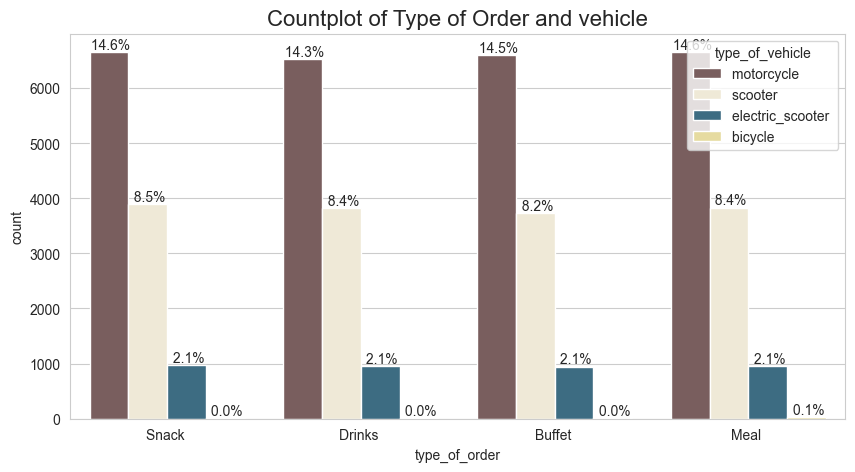

In [11]:
countplot(
    data = data,
    column_name = 'type_of_order',
    title= "Countplot of Type of Order and vehicle",
    hue = 'type_of_vehicle',
    figsize=(10, 5),
    bar_labels = True,
    horizontal = False,
);

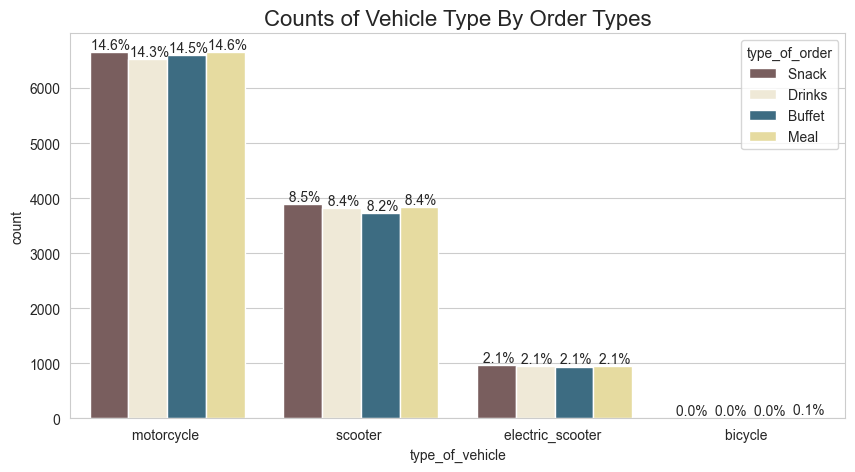

In [58]:
countplot(
    data = data,
    column_name = 'type_of_vehicle',
    title= "Counts of Vehicle Type By Order Types",
    hue = 'type_of_order',
    figsize=(10, 5),
    bar_labels = True,
    horizontal = False,
);

Lets see `delivery_person_ratings` distrubiotion

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


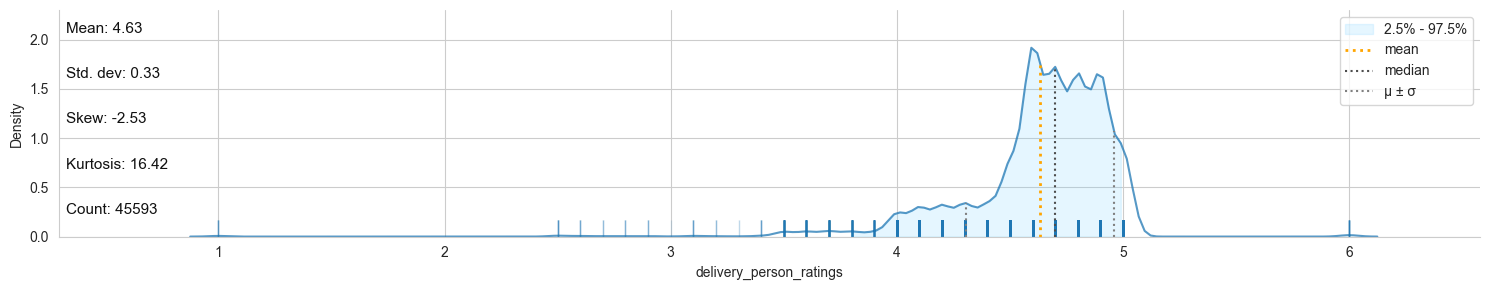

In [12]:
klib.dist_plot(data['delivery_person_ratings']);

Information about Delivery ratings unique

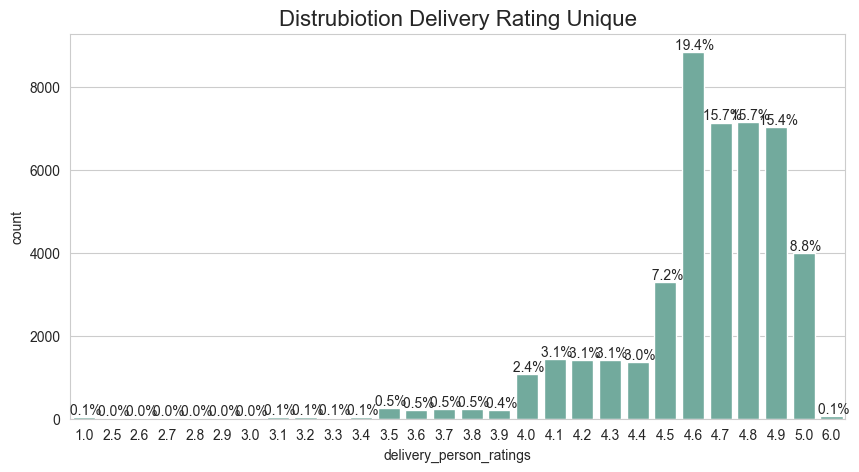

In [13]:
countplot(
    data = data,
    column_name = 'delivery_person_ratings',
    bar_labels = True,
    title = 'Distrubiotion Delivery Rating Unique'
);

Here, I find the most rate is **4.6** and I should investigation about rate.

So, I concludeed to create new feature to identify Gereral Rate (1,2,3,...)

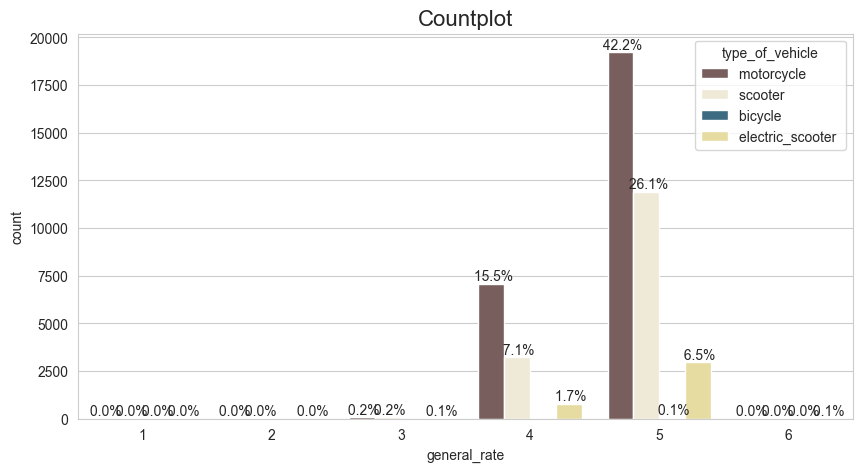

In [14]:
data['general_rate'] = data['delivery_person_ratings'].round().astype(int)

countplot(
    data = data,
    column_name = 'general_rate',
    bar_labels = True,
    hue = 'type_of_vehicle',
);

Ploting rate of the delivery portners distribution 

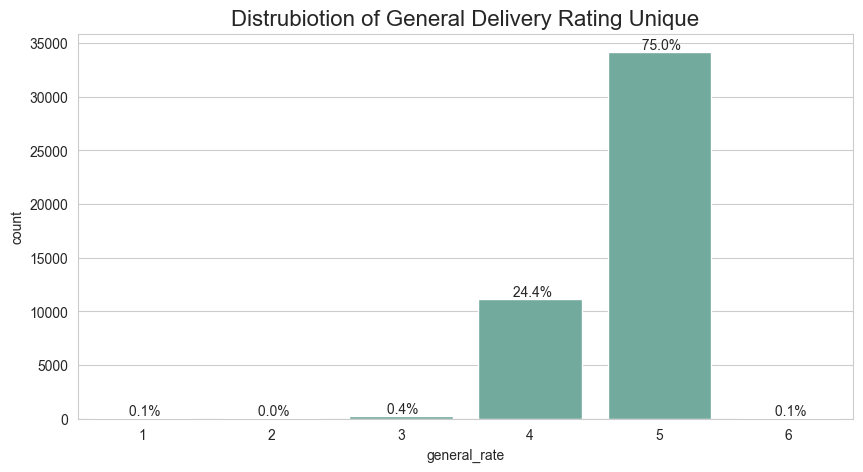

In [15]:
countplot(
    data = data,
    column_name = 'general_rate',
    bar_labels = True,
    title = 'Distrubiotion of General Delivery Rating Unique'
);

Oh! Here, I figureed out I have outlier rate **(6)** , Generaly there has been rate between (0,5), Let`s Explor

In [55]:
data[data['delivery_person_ratings']> 5 ].head()

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,type_of_order,type_of_vehicle,time_taken(min),general_rate
3586,46D,BANGRES05DEL01,50,6.000,-12.970,-77.646,13.010,77.686,Meal,electric_scooter,25,6
4714,493,HYDRES17DEL01,50,6.000,-17.452,-78.386,17.562,78.496,Snack,bicycle,27,6
5169,4F2,JAPRES08DEL01,50,6.000,-26.910,-75.783,27.020,75.893,Drinks,scooter,20,6
5362,430,BANGRES19DEL01,50,6.000,12.914,77.678,13.024,77.788,Meal,electric_scooter,18,6
5651,BEF 1.00,AGRRES13DEL02,50,6.000,-27.160,-78.043,27.210,78.093,Drinks,scooter,20,6


In [17]:
data[data['delivery_person_ratings']> 5 ].groupby(data['delivery_person_age']).size()

delivery_person_age
50    53
dtype: int64

I have 53 Rows with 6 Rate

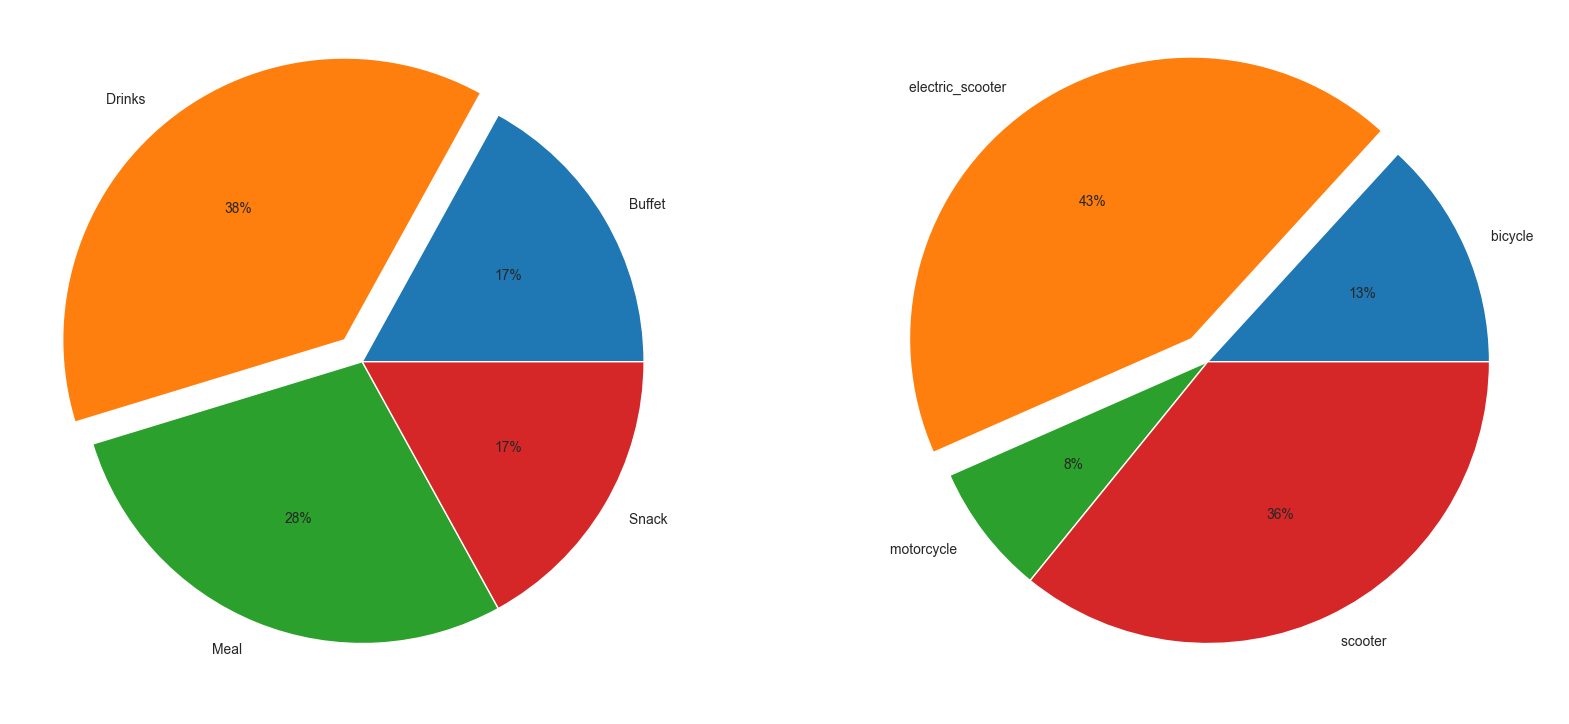

In [18]:
fig, ax = plt.subplots(ncols=2 , nrows=1, figsize=(20,15))
explode = [0, 0.1, 0, 0]

data[data['delivery_person_ratings'] > 5 ].groupby(data['type_of_order']).size().plot(kind='pie',autopct='%1.0f%%', explode= explode, ax=ax[0])
data[data['delivery_person_ratings']> 5 ].groupby(data['type_of_vehicle']).size().plot(kind='pie',autopct='%1.0f%%', explode=explode, ax=ax[1])

plt.show()

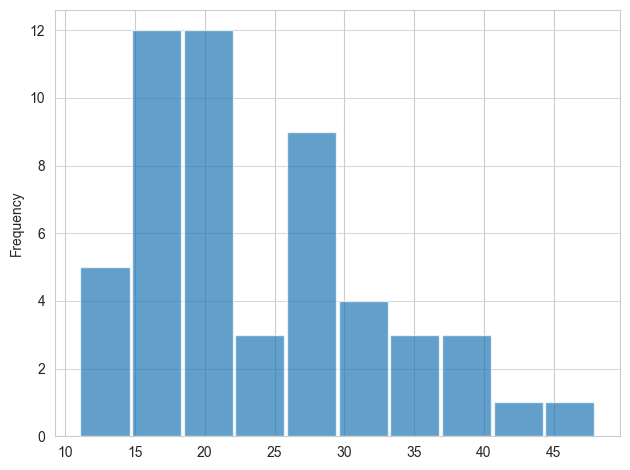

In [19]:
data[data['delivery_person_ratings'] > 5 ]['time_taken(min)'].plot(kind='hist',bins=10 ,alpha = 0.7 ,rwidth = 0.95)

plt.grid(axis= 'y' , alpha = 0.75)
plt.tight_layout()
plt.show()

Ploting age of the delivery portners distribution

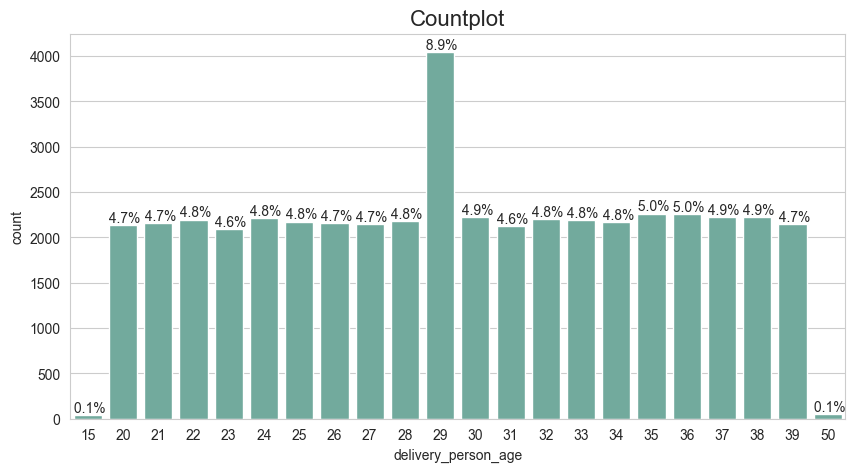

In [23]:
countplot(
    data = data,
    column_name = 'delivery_person_age',
    bar_labels = True,
);

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


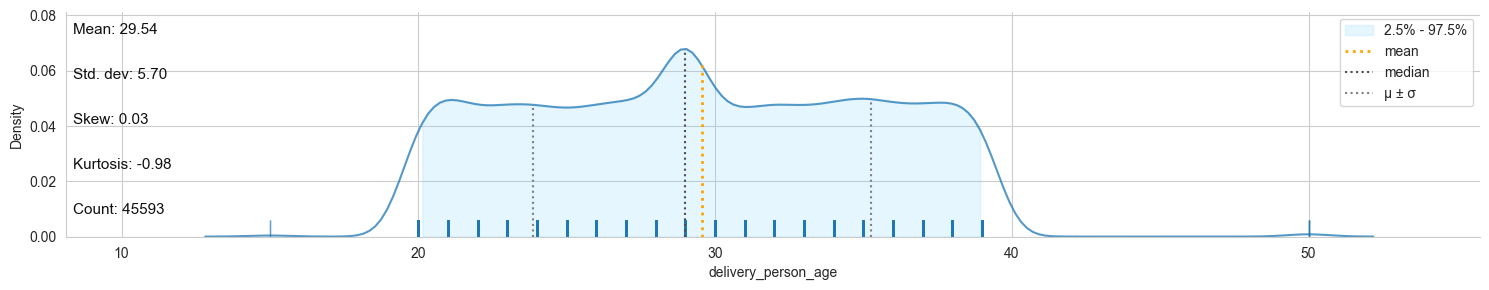

In [25]:
klib.dist_plot(data['delivery_person_age']);

Ploting Time taken distribution 

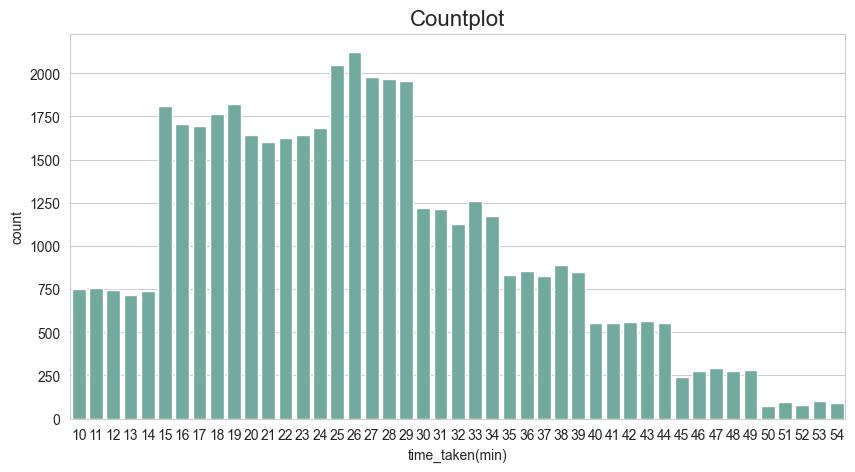

In [46]:
countplot(
    data = data,
    column_name = 'time_taken(min)',
);

Here snippet calculates the distance between two points on the Earth, specified by their latitude and longitude coordinates, using the **Haversine** formula. The calculation is done in Python, and it's applied to a dataset to compute distances between pairs of points (from a restaurant to a delivery location).

Now, I calculated the distance between the restaurant and the delivery location, also added a new feature in the dataset as `distance`.

In [59]:
# Set the earth's radius (in kilometers)
R = 6371

# Formula: radians = degrees * (π / 180)
# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    # lat1, lon1 are the latitude and longitude of the first point (e.g., a restaurant)
    d_lat = deg_to_rad(lat2-lat1)
    #  lat2, lon2 are the latitude and longitude of the second point (e.g., a delivery location).
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c
    # The Haversine formula is then applied:
    # a calculates the square of half the chord length between the points.
    # c calculates the angular distance in radians.
    # The distance d is then found by multiplying c by the Earth's radius, R.
    # Returns the distance in kilometers between the two points.

# Calculate the distance between each pair of points
data['distance'] = np.nan
# data['distance'] = np.nan: Initializes a new column in the data DataFrame to store the calculated distances

# The loop iterates over each row in the data DataFrame:
# For each row, it calculates the distance between the restaurant's location (Restaurant_latitude, Restaurant_longitude) 
# and the delivery location (Delivery_location_latitude, Delivery_location_longitude) using the distcalculate function.

for i in range(len(data)):
    data.loc[i, 'distance'] = distcalculate(data.loc[i, 'restaurant_latitude'], 
                                        data.loc[i, 'restaurant_longitude'], 
                                        data.loc[i, 'delivery_location_latitude'], 
                                        data.loc[i, 'delivery_location_longitude'])

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           45593 non-null  object 
 1   delivery_person_id           45593 non-null  object 
 2   delivery_person_age          45593 non-null  int64  
 3   delivery_person_ratings      45593 non-null  float64
 4   restaurant_latitude          45593 non-null  float64
 5   restaurant_longitude         45593 non-null  float64
 6   delivery_location_latitude   45593 non-null  float64
 7   delivery_location_longitude  45593 non-null  float64
 8   type_of_order                45593 non-null  object 
 9   type_of_vehicle              45593 non-null  object 
 10  time_taken(min)              45593 non-null  int64  
 11  general_rate                 45593 non-null  int32  
 12  distance                     45593 non-null  float64
dtypes: float64(6), i

## Data Exploration

Now, let's analyze the data to discover relationships between the different features. To begin, I will examine the connection between the distance traveled and the time it takes to deliver the food.

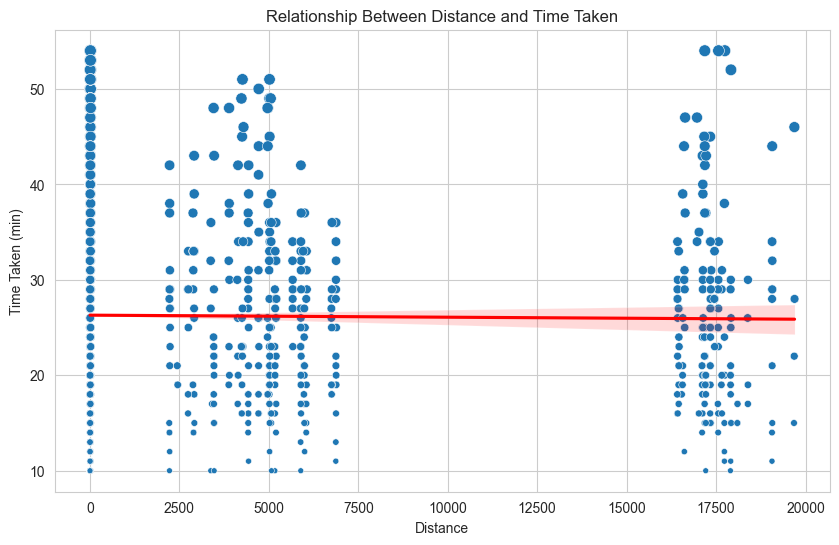

In [70]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=data, x="distance", y="time_taken(min)", size="time_taken(min)", legend=False)

sns.regplot(data=data, x="distance", y="time_taken(min)", scatter=False, ax=scatter.axes, color='r')

plt.xlabel('Distance')
plt.ylabel('Time Taken (min)')
plt.title('Relationship Between Distance and Time Taken')
plt.show()

There is a clear connection between the time it takes and the distance covered for food delivery. This means that the majority of delivery partners are able to deliver food within 25-30 minutes, regardless of the distance involved.

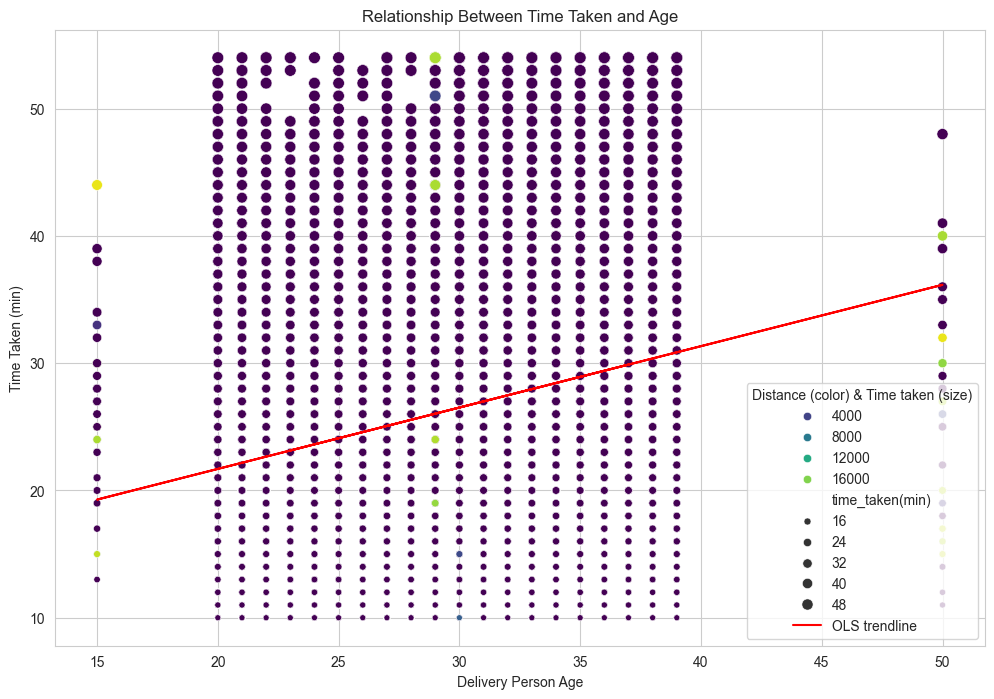

In [74]:
from scipy import stats

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=data, x="delivery_person_age", y="time_taken(min)", 
                          size="time_taken(min)", hue="distance", legend=True, palette='viridis')


slope, intercept, r_value, p_value, std_err = stats.linregress(data['delivery_person_age'], data['time_taken(min)'])
line = slope * data['delivery_person_age'] + intercept

plt.plot(data['delivery_person_age'], line, label='OLS trendline', color='red')

plt.xlabel('Delivery Person Age')
plt.ylabel('Time Taken (min)')
plt.title('Relationship Between Time Taken and Age')

handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles[1:], labels=labels[1:], title='Distance (color) & Time taken (size)')

plt.show()

This plot is a scatter plot showing the relationship between the age of a delivery person and the time taken for deliveries

- **Point Color**: The color of the points corresponds to the distance of the delivery. Darker colors represent shorter distances, while lighter colors imply longer distances. The exact distance values that these colors represent are likely included in a separate key or legend not visible in the image.

- **Point Size**: The size of the points indicates the actual time taken for the deliveries in minutes. Larger points suggest longer delivery times, while smaller points indicate shorter delivery times.

- **Trend Line (Red Line)**: A red trend line (OLS - Ordinary Least Squares regression line) has been added to the plot, suggesting a general trend or relationship between the age of the delivery person and the time taken for deliveries. In this case, the trend line is upward-sloping, indicating that as the age of the delivery person increases, there might be a tendency for the time taken for deliveries to increase as well.

- **Data Density**: There's a notable concentration of data points at certain ages, which could indicate that there are more delivery persons within those age ranges or that more data has been collected for those ages.

- **Outliers**: There are some points that stand out from the general pattern, particularly at higher ages. These could be outliers or could represent older delivery personnel who take significantly different amounts of time to complete deliveries compared to the average.